In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from Config import weather_api_key

#URL setup
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key


In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


628

In [3]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")  + '&units=imperial'

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | palmas
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | farah
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | raudeberg
Processing Record 17 of Set 1 | miyako
Processing Record 18 of Set 1 | abalak
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | sibagat
Processing Record 21 of Set 1 | port macquarie
Processing Record 22 of Set 1 | liverpool
Processing Record 23 of Set 1 | avera
Processing Record 24 of Set 1 | jamestown
Processing Record 25 of Set 1 | albany

Processing Record 38 of Set 4 | janauba
Processing Record 39 of Set 4 | wagar
Processing Record 40 of Set 4 | san andres
Processing Record 41 of Set 4 | souris
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | ballina
Processing Record 44 of Set 4 | estevan
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | tilichiki
Processing Record 47 of Set 4 | krasnoselkup
Processing Record 48 of Set 4 | gaya
Processing Record 49 of Set 4 | gusev
Processing Record 50 of Set 4 | vostok
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | nogliki
Processing Record 3 of Set 5 | saint anthony
Processing Record 4 of Set 5 | moerai
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | warmbad
Processing Record 7 of Set 5 | great yarmouth
Processing Record 8 of Set 5 | terre haute
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | mirnyy
Processing Record 11 of Set 5 | dunedin
Processing Reco

Processing Record 28 of Set 8 | springbok
Processing Record 29 of Set 8 | boz
Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | yokadouma
Processing Record 32 of Set 8 | butzbach
Processing Record 33 of Set 8 | marzuq
Processing Record 34 of Set 8 | havoysund
Processing Record 35 of Set 8 | youghal
Processing Record 36 of Set 8 | porto nacional
Processing Record 37 of Set 8 | cherskiy
Processing Record 38 of Set 8 | najran
Processing Record 39 of Set 8 | erzin
Processing Record 40 of Set 8 | bjornevatn
Processing Record 41 of Set 8 | porangatu
Processing Record 42 of Set 8 | lasem
Processing Record 43 of Set 8 | clyde river
Processing Record 44 of Set 8 | sao miguel do araguaia
Processing Record 45 of Set 8 | ahipara
Processing Record 46 of Set 8 | aquiraz
Processing Record 47 of Set 8 | nalut
Processing Record 48 of Set 8 | miraflores
Processing Record 49 of Set 8 | the valley
Processing Record 50 of Set 8 | bairiki
Processing Record 1 of Set 9 | marcona
City 

Processing Record 11 of Set 12 | tecoanapa
Processing Record 12 of Set 12 | acapulco
Processing Record 13 of Set 12 | almaznyy
Processing Record 14 of Set 12 | san quintin
Processing Record 15 of Set 12 | mount isa
Processing Record 16 of Set 12 | mufulira
Processing Record 17 of Set 12 | havre-saint-pierre
Processing Record 18 of Set 12 | shipunovo
Processing Record 19 of Set 12 | aden
Processing Record 20 of Set 12 | mildura
Processing Record 21 of Set 12 | tahe
Processing Record 22 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | quatre cocos
Processing Record 25 of Set 12 | reitz
Processing Record 26 of Set 12 | sandpoint
Processing Record 27 of Set 12 | pangkalanbuun
Processing Record 28 of Set 12 | champerico
Processing Record 29 of Set 12 | lixourion
Processing Record 30 of Set 12 | puerto carreno
Processing Record 31 of Set 12 | birjand
Processing Record 32 of Set 12 | pascagoula
Processing Record 33 of Se

In [5]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.91,58,0,31.07,CL,2021-11-23 22:58:48
1,Ushuaia,-54.8000,-68.3000,44.33,76,84,4.09,AR,2021-11-23 23:02:36
2,Kodiak,57.7900,-152.4072,16.74,81,100,10.11,US,2021-11-23 23:01:53
3,Palmas,-10.2128,-48.3603,75.78,90,100,1.30,BR,2021-11-23 23:02:48
4,Dikson,73.5069,80.5464,1.42,94,100,12.37,RU,2021-11-23 23:02:49
...,...,...,...,...,...,...,...,...,...
570,Coihaique,-45.5752,-72.0662,62.55,42,75,9.22,CL,2021-11-23 23:18:54
571,Deputatskiy,69.3000,139.9000,-24.57,96,100,3.04,RU,2021-11-23 23:18:55
572,Benguela,-12.5763,13.4055,77.16,82,85,4.63,AO,2021-11-23 23:18:55
573,Boende,-0.2167,20.8667,71.69,96,81,0.85,CD,2021-11-23 23:18:56


In [6]:
new_column_order = ["City" , "Country" , "Date" , "Lat" , "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-11-23 22:58:48,-53.1500,-70.9167,51.91,58,0,31.07
1,Ushuaia,AR,2021-11-23 23:02:36,-54.8000,-68.3000,44.33,76,84,4.09
2,Kodiak,US,2021-11-23 23:01:53,57.7900,-152.4072,16.74,81,100,10.11
3,Palmas,BR,2021-11-23 23:02:48,-10.2128,-48.3603,75.78,90,100,1.30
4,Dikson,RU,2021-11-23 23:02:49,73.5069,80.5464,1.42,94,100,12.37
5,Busselton,AU,2021-11-23 23:01:24,-33.6500,115.3333,60.04,61,1,7.00
6,Taltal,CL,2021-11-23 23:00:19,-25.4000,-70.4833,62.01,78,41,2.84
7,Vaini,TO,2021-11-23 23:02:50,-21.2000,-175.2000,84.36,84,20,5.75
8,Butaritari,KI,2021-11-23 23:02:50,3.0707,172.7902,82.00,73,100,16.11
9,Bluff,NZ,2021-11-23 23:02:51,-46.6000,168.3333,56.19,71,100,14.54


In [7]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


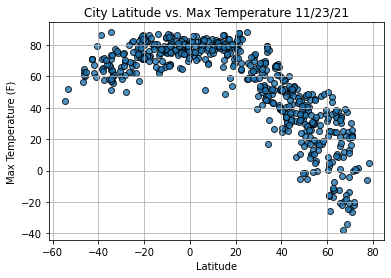

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

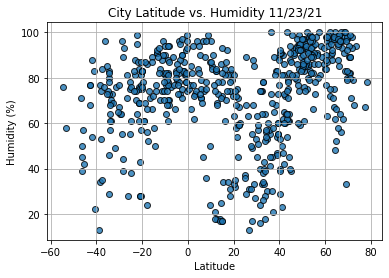

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


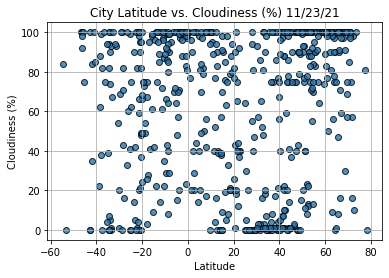

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

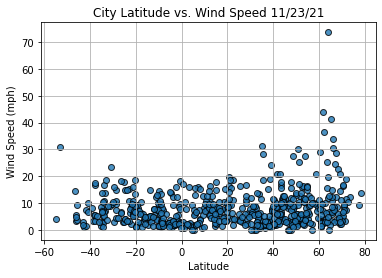

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [13]:
# from scipy.stats import linregress
# # Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.title(title)
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

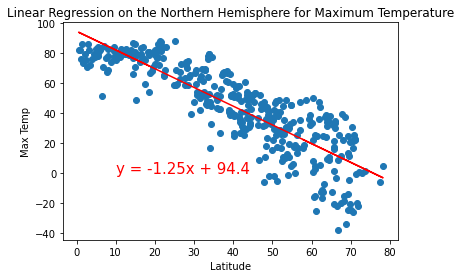

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,0))


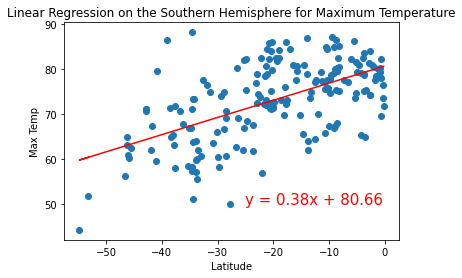

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-25,50))


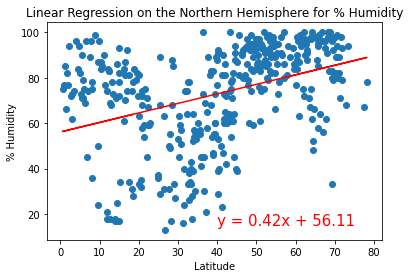

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,15))

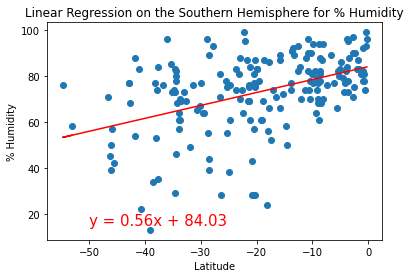

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))



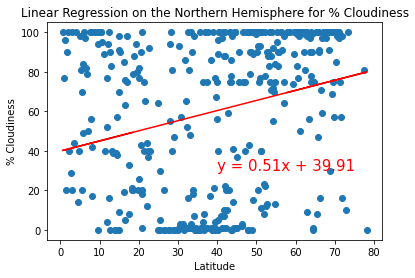

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))


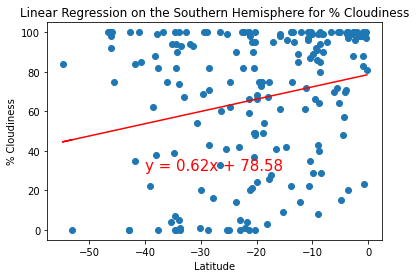

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-40,30))


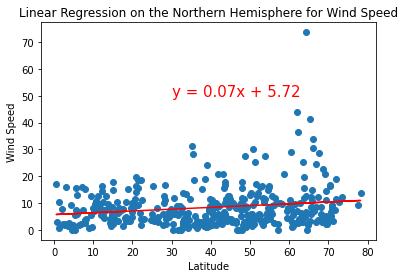

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(30,50))

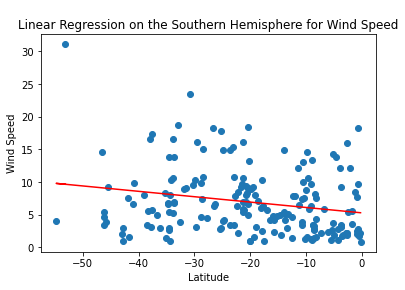

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))